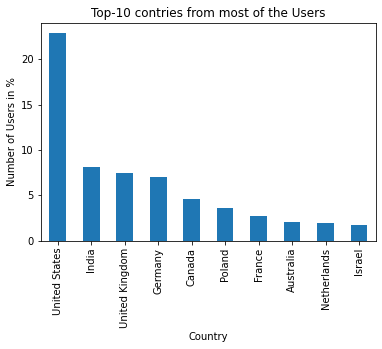

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from IPython import display
%matplotlib inline
from collections import Counter


#Question 1: Where do most Stack Overflow users come from
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

users_vals = df['Country'].value_counts()
((users_vals[:10]/df.shape[0]) * 100).plot(kind="bar")
plt.title("Top-10 contries from most of the Users")
plt.xlabel("Country")
plt.ylabel("Number of Users in %")
plt.show()



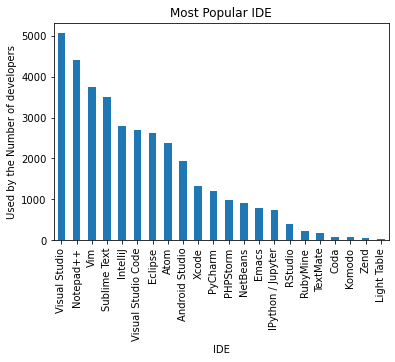

In [18]:

#Question 2: Which IDE is popular amongts developer
ide_data = df[~df['IDE'].isna()]['IDE'] # ignore na data

#get the unique IDE list from the data
uniqueListOfIDE = []
for entry in ide_data:
    tempArr = entry.split('; ')
    uniqueListOfIDE += tempArr

dict_b = {}
#Count for each IDE, number of users are using this IDE
c = Counter(uniqueListOfIDE)
# Create dictiory as IDE:Count
dict_b = { k: c[k] for k in c.keys()}

# from dict create dataframe
new_df = pd.DataFrame.from_dict(dict_b, orient='index')
# rename column as count
new_df.columns = ['count']
# sort by count
new_df.sort_values('count', ascending=False, inplace=True)
#plot
new_df['count'].plot(kind="bar", title="test")
plt.title("Most Popular IDE")
plt.xlabel("IDE")
plt.ylabel("Used by the Number of developers")

plt.show()


In [20]:
#Question 3: What respondents value the most when considering a new Job


#step1: Get columns, which indicates respondents accessment. StartsWith "Assess"
aspects = []
for col in df.columns:
    if(col.startswith("Assess")):
        aspects.append(col)  

# get the column description
def get_description(column_name, schema = schema):
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
#     # using split()
#     # Get String after substring occurrence
    res = desc.split("When you're assessing potential jobs to apply to, how important are each of the following to you? ", 1)
    return res[1] # Get the description of each Assess

# find the proportion of people thinking each aspect is important 
rating = ['Very important', 
          'Somewhat important', 
          'Important',
          'Not very important', 
          'Not at all important']
mapping = {'Very important':1, 'Somewhat important':1, 'Important':1,'Not very important':0, 'Not at all important':0 }

def find_aspect_ratios(df):
    """
    For each aspect of job, find the fraction of people that recognize it as important. 
    
    Input: original dataframe
    Output: a new dataframe with one column as aspect name, the other column as the fraction of people
    """
    dic = {}
    for aspect in aspects:
        tmp = df[df[aspect].isna() == False][aspect]  # this would give me a column if record is not na
        tmp = tmp.map(mapping)
        dic[get_description(aspect)] = np.mean(tmp)
        
    # finally we have dataframe with Aspects & proportion
    aspect_df = pd.DataFrame(list(dic.items()), columns=['Aspect', 'Proportion']).set_index(['Aspect']).sort_values('Proportion',ascending=False)     
    return aspect_df;


def plot_aspects(df1, df2, name1, name2):
    ratio_1 = find_aspect_ratios(df1)
    ratio_2 =  find_aspect_ratios(df2)
    
    comp_df = pd.merge(ratio_1, ratio_2, left_index=True, right_index=True)
    comp_df.columns =[name1, name2]
    comp_df['Diff_HigherEd_Vals'] = (comp_df[name1] - comp_df[name2])
    out = comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])
    return out;

# # Degree based comparison
def higher_ed(formal_ed_str):
    if formal_ed_str in ("Master's degree", "Professional degree", "Doctoral degree"):
        return 1
    else:
        return 0

df['HigherEd'] = df['FormalEducation'].apply(higher_ed)

# higher_ed_df = df.loc[df['HigherEd'] == 1]['FormalEducation']
# lower_ed_df = df.loc[df['HigherEd'] == 0]['FormalEducation']
higher_ed_df = df.loc[df['HigherEd'] == 1]
lower_ed_df = df.loc[df['HigherEd'] == 0]

plot_aspects(higher_ed_df, lower_ed_df, "higherEd", "LowerEd")


,higherEd,LowerEd,Diff_HigherEd_Vals
Aspect,,,
Opportunities for professional development,0.974014,0.966770,0.007244
The compensation and benefits offered,0.965179,0.957516,0.007663
The amount of time I'd have to spend commuting,0.945316,0.933115,0.012201
The office environment I'd be working in,0.943548,0.953309,-0.009761
"The languages, frameworks, and other technologies I'd be working with",0.937584,0.937510,0.000073
How projects are managed at the company or organization,0.928285,0.929625,-0.001340
The experience level called for in the job description,0.894149,0.880825,0.013324
The financial performance or funding status of the company or organization,0.868068,0.874080,-0.006012
The specific department or team I'd be working on,0.846085,0.850366,-0.004281
